# XAI workshop: Application of concepts and methods
This notebook will guide you through the implementation of the XAI methods we have seen in the slides. We will first see an example of an easily explainable model (linear regression). It is the simplest one to interpret in regards to its low complexity (see fig. 1).

![picture](https://blog.arya.ai/content/images/2021/05/Accuracy-vs.-interpretabilityV1.PNG)
*Fig. 1*

We will then move on to more advanced models with multiple examples of neural networks.

Let's get to work! 🚀

## 1. Linear regression
This first example will help us understand the importance of explanability and how straigthforward it is to apply to a simple model.

We will use the dataset coming from: https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset.

### Imports

In [ ]:
import pandas as pd
import sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Exploring data

In [ ]:
# Get data from sklearn
X,y = fetch_california_housing(return_X_y=True, as_frame=True)

In [ ]:
# Take a look at data types
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
# Take a look at the basic statistical indicators for our features
X.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -121.800000  
50%        2.818116     34.260000   -118.490000  
75%        3.282261     37.710000   -118.010000  
max     1243.333333     41.950000   -114.310000

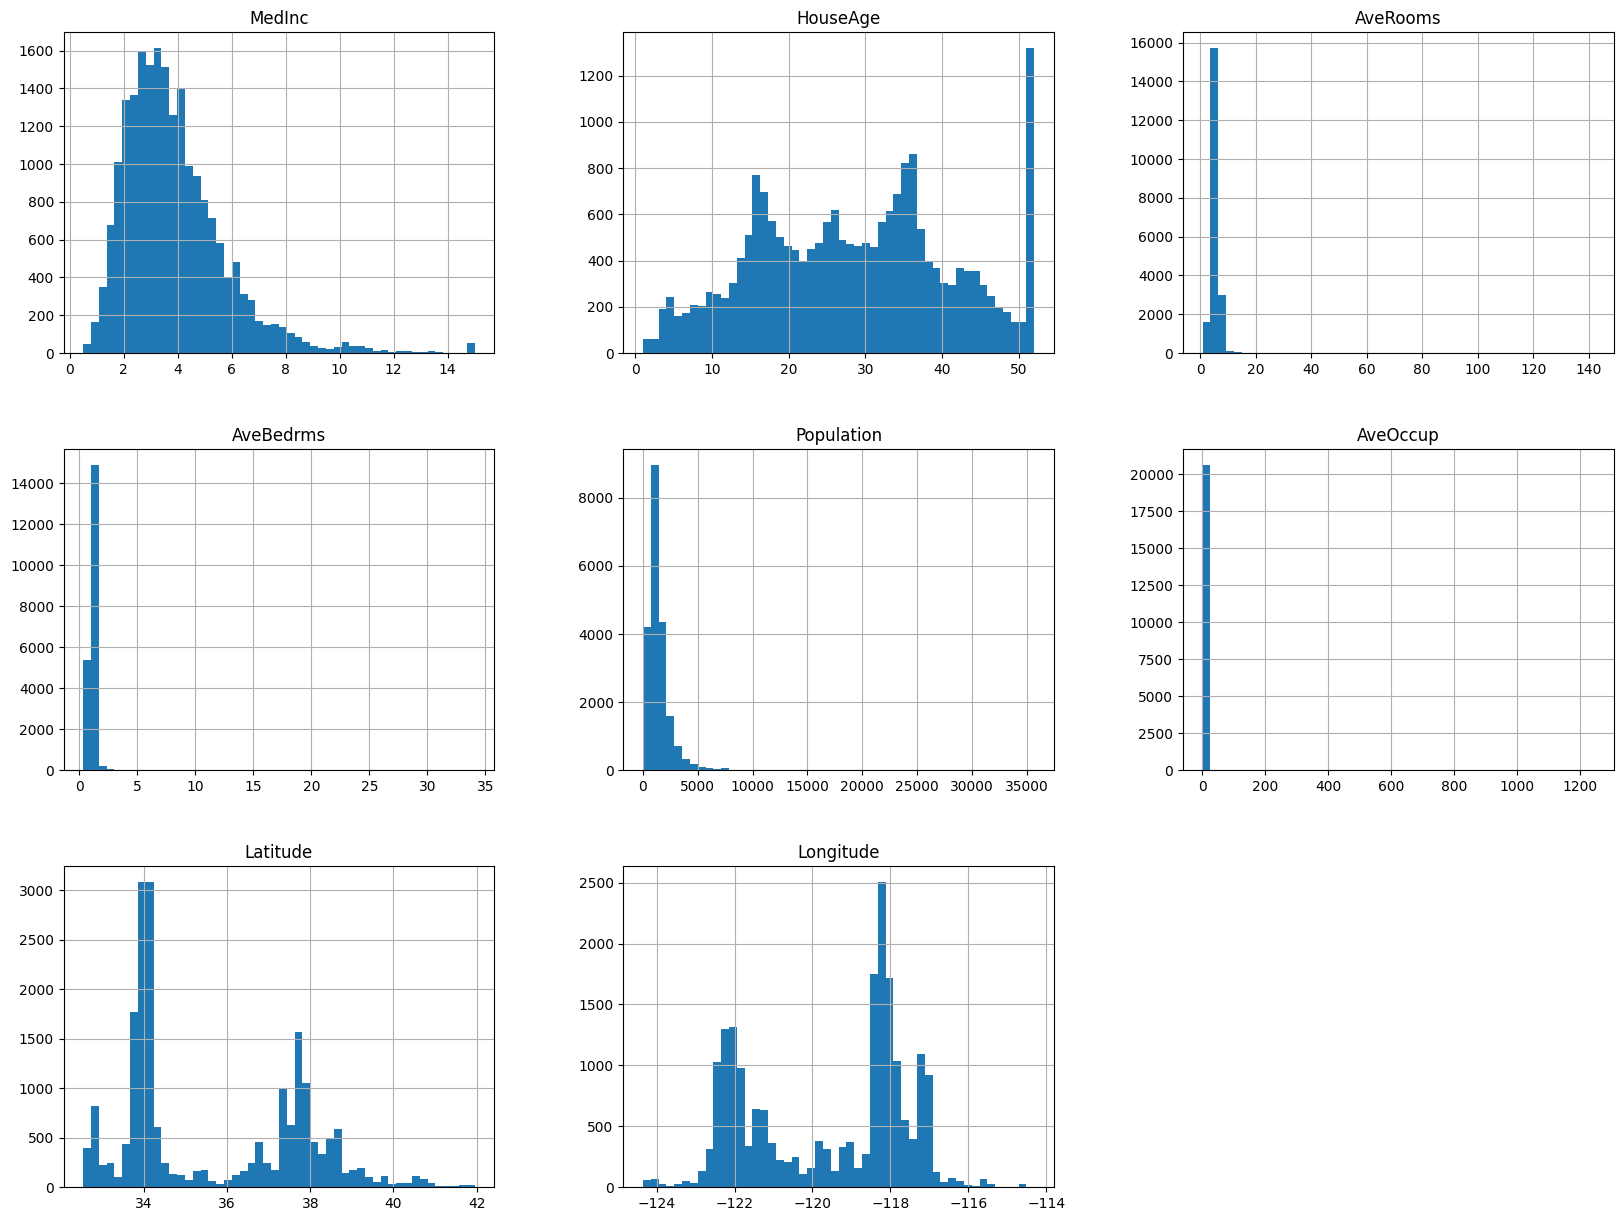

In [ ]:
# Plot each feature values
%matplotlib inline
X.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [ ]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

### Create model

In [ ]:
# Split dataset between train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((15480, 8), (15480,), (5160, 8), (5160,))

The following cell will have to be filled in and ran later on. For now, you can just skip it.

In [ ]:
# Scale the features using standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define and fit model
model = sklearn.linear_model.LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Make a prediction
y_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate model using MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)**(0.5)
mse

0.7356145375446769

In [ ]:
# Evaluate using R squared
print('Linear Regression R squared": %.4f' % model.score(X_test_scaled, y_test))

Linear Regression R squared": 0.5911


In our model, 59.11% of the variability in y can be explained using X.

### General coefficient values

In [ ]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(4))

Model coefficients:

MedInc = 0.4476
HouseAge = 0.0096
AveRooms = -0.1248
AveBedrms = 0.7945
Population = -0.0
AveOccup = -0.0034
Latitude = -0.4186
Longitude = -0.4334


We can now see the impact of the various features on our output. However, the scale of the features (changing the unit of measurement e.g.) can impact their importance in the model. Go back to the cell you skipped earlier and implement a solution to this issue. Then, retrain the model and come back here. 😏

### General coefficient values after preprocessing

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_
})
importances = importances.sort_values(by='Importance', ascending=True)

In [ ]:
print(importances)

    Attribute  Importance
6    Latitude   -0.893147
7   Longitude   -0.867840
2    AveRooms   -0.302106
5    AveOccup   -0.041164
4  Population   -0.001645
1    HouseAge    0.120655
3   AveBedrms    0.348606
0      MedInc    0.852108


We can see that the values changed. Let's plot our features importance.

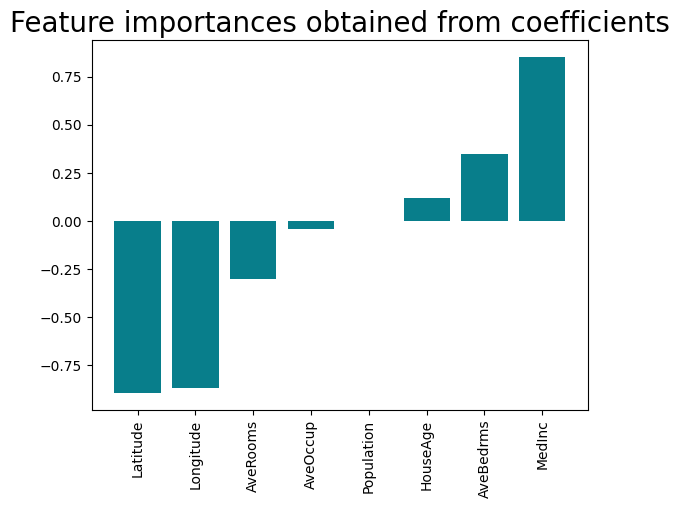

In [ ]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Conclusion
We have seen that understanding the importance of various features in general is quite easy in a linear regression. You can also increase the precision of the interpretability by using L1 and/or L2 regularisation using [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) for example.

## 2. XGBoost
This second example will use a more opaque model called XGBoost. Based on decision trees, it will enable us to make our first use of more advanced XAI techniques to understand how predictions are made.

We will use the same data as before. That will save us some exploration steps and allow us to compare the importance of features across models.

### Imports

In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 12.4 MB/s eta 0:00:00


In [2]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=b495340ec6fbcb0989962d80b64b4dbc10439784af1bf438cca7b56e778483b8
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [3]:
import requests
from io import StringIO
import numpy as np
from numpy import absolute
from sklearn import linear_model
import shap
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
shap.initjs()
import lime
import lime.lime_tabular
import matplotlib.pylab as pl
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

### Read data and build model

In [4]:
# Get data from sklearn
X,y = fetch_california_housing(return_X_y=True, as_frame=True)

NameError: ignored

In [ ]:
print(y, X)

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Create XGBoost regression model
xgb_model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb_model.fit(X_train, y_train)

In [ ]:
# Make a prediction
y_pred = xgb_model.predict(X_test)
y_pred

In [ ]:
# Evaluate model using MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)**(0.5)
mse

In [ ]:
# Evaluate using R squared (to verify)
print('XGBoost R squared": %.4f' % xgb_model.score(X_test, y_test))

### Explainability techniques ([XGBoost python API](https://xgboost.readthedocs.io/en/stable/python/python_api.html))
These techniques use the tree structure of the XGBoost regression model to help interpret the results.

From documentation:

"How the importance is calculated: either 'weight', 'gain', or 'cover'
*   'weight' is the number of times a feature appears in a tree
*   'gain' is the average gain of splits which use the feature
*   'cover' is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split."


In [ ]:
# Plot importance based on fitted trees
xgb.plot_importance(xgb_model, importance_type="cover")
pl.title('xgboost.plot_importance(model, importance_type="cover")')
pl.show()

In [ ]:
xgb.plot_importance(xgb_model, importance_type="gain")
pl.title('xgboost.plot_importance(model, importance_type="gain")')
pl.show()

### LIME

In [ ]:
xgb_model.fit(X_train.values, y_train.values)

In [ ]:
test_pred = xgb_model.predict(X_test.values)
errors = test_pred - y_test.values
sorted_errors = np.argsort(abs(errors))
worse_5 = sorted_errors[-5:]
best_5 = sorted_errors[:5]

print(pd.DataFrame({'worse':errors[worse_5]}))
print()
print(pd.DataFrame({'best':errors[best_5]}))

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=['SalePrice'], verbose=True, mode='regression')

In [ ]:
# Explaining worse_pred n°1
i = worse_5[0]
print('Error =', errors[i])
exp = explainer.explain_instance(X_train.values[i], xgb_model.predict, num_features=8)
exp.show_in_notebook(show_table=True)

In [ ]:
# Explaining worse_pred n°2
i = worse_5[1]
print('Error =', errors[i])
exp = explainer.explain_instance(X_test.values[i], xgb_model.predict, num_features=8)
exp.show_in_notebook(show_table=True)

In [ ]:
# Explaining best_pred n°1
i = best_5[0]
print('Error =', errors[i])
exp = explainer.explain_instance(X_test.values[i], xgb_model.predict, num_features=8)
exp.show_in_notebook(show_table=True)

In [ ]:
# Explaining best_pred n°1
i = best_5[1]
print('Error =', errors[i])
exp = explainer.explain_instance(X_test.values[i], xgb_model.predict, num_features=8)
exp.show_in_notebook(show_table=True)

### Shapley Values (SHAP)

#### Calculate SHAP Values

In [ ]:
explainer = shap.TreeExplainer(xgb_model)
expected_value = explainer.expected_value

#### Generate forceplot

In [ ]:
shap_values = explainer(X_test)

In [ ]:
shap.plots.waterfall(shap_values[1])

In [ ]:
shap.summary_plot(shap_values, X_test)

## 3. Explainable Boosting Machines
This time, we will stay on the same kind of model but using a different approach: the explainability by default. Indeed, the explainable bosting machines (EBMs) are glass-box models that provide near state-of-the-art performance. We will be able to interpret the results without needed XAI techniques as an after-thought!

Documentation for the more curious among us: https://interpret.ml/docs/ebm.html.

### Imports

In [ ]:
!pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 91.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 98.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.7 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.7
    Uninstalling Werkzeug-2.3.7:
      Successfully uninstalled Werkzeug-2.3.7


In [ ]:
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show

### Train Model

In [ ]:
ebm = ExplainableBoostingRegressor()
ebm.fit(X_train, y_train)

ExplainableBoostingRegressor()

### Calculate Global Explaination

In [ ]:
ebm_global = ebm.explain_global()

### Plot Global Variable Importance

In [ ]:
show(ebm_global)

### Local explainations

In [ ]:
ebm_local = ebm.explain_local(X_test, y_test)
show(ebm_local)

## 4. NLP model

Requires a GPU (free T4 from Colab is fine)

Code from https://shap.readthedocs.io/en/latest/example_notebooks/text_examples/text_generation/Open%20Ended%20GPT2%20Text%20Generation%20Explanations.html

### Imports

In [ ]:
!pip install transformers
!pip install shap
!pip install torch

In [ ]:
import numpy as np
from transformers import AutoTokenizer, AutoModelForCausalLM
import shap
import torch

### Load model and tokenizer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("gpt2", use_fast=True)
model = AutoModelForCausalLM.from_pretrained("gpt2") #.cuda()

In [ ]:
# set model decoder to true
model.config.is_decoder=True
# set text-generation params under task_specific_params
model.config.task_specific_params["text-generation"] = {
    "do_sample": True,
    "max_length": 50,
    "temperature": 0.7,
    "top_k": 50,
    "no_repeat_ngram_size": 2
}

### Define initial text

In [ ]:
s = ['I enjoy walking with my cute dog']

### Create explainer object and computer SHAP values

In [ ]:
explainer = shap.Explainer(model, tokenizer)
shap_values = explainer(s)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.


  0%|          | 0/42 [00:00<?, ?it/s]

Partition explainer: 2it [00:12, 12.97s/it]               


### Visualize shap explanations

In [ ]:
shap.plots.text(shap_values)

## 4b. Likelihood of generating an output based on the input

### Define input and output

In [ ]:
# define input
x = [
    "I know many people who are Russian.",
    "I know many people who are Greek.",
    "I know many people who are Australian.",
    "I know many people who are American.",
    "I know many people who are Italian.",
    "I know many people who are Spanish.",
    "I know many people who are German.",
    "I know many people who are Indian."
]

In [ ]:
# define output
y = [
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!"
]

### Wraping the model, creating explainer and generating SHAP values

In [ ]:
teacher_forcing_model = shap.models.TeacherForcing(model, tokenizer)
masker = shap.maskers.Text(tokenizer, mask_token = "...", collapse_mask_token=True)

In [ ]:
explainer = shap.Explainer(teacher_forcing_model, masker)

In [ ]:
shap_values = explainer(x, y)

  0%|          | 0/56 [00:00<?, ?it/s]

Partition explainer:  62%|██████▎   | 5/8 [00:18<00:08,  2.80s/it]

  0%|          | 0/56 [00:00<?, ?it/s]

Partition explainer: 100%|██████████| 8/8 [00:33<00:00,  4.16s/it]

  0%|          | 0/56 [00:00<?, ?it/s]

Partition explainer: 9it [00:39,  5.58s/it]


### Plotting results

In [ ]:
shap.plots.text(shap_values)

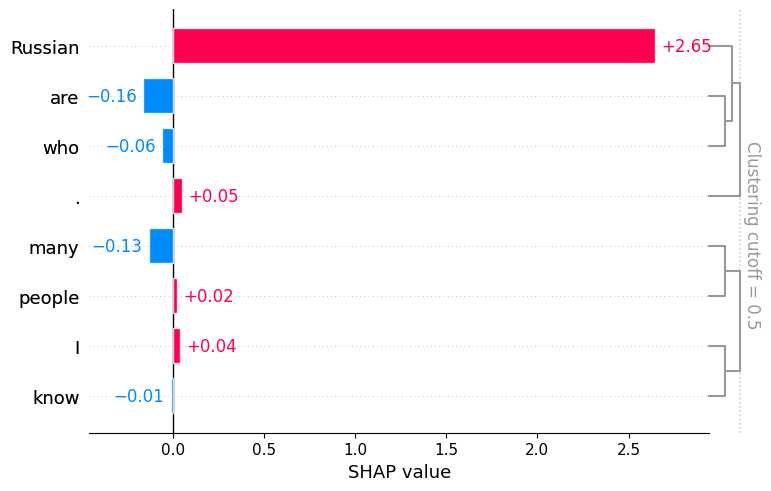

In [ ]:
shap.plots.bar(shap_values[0, :, "vodka"])

## 1x: Linear regression (cancelled)
This first example will help us understand the importance of explanability and how straigthforward it is to apply to a simple model.

### Imports

In [ ]:
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

### Dataset link

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
r = requests.get(url)

### Read the file in and store as df

In [ ]:
file = r.text.replace("\t"," ")
list_labels = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin','car name']
df = pd.read_csv(StringIO(file),sep="\s+",header = None,names=list_labels)

### Modeling

In [ ]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(df[['cylinders']])
train_y = np.asanyarray(df[['mpg']])
regr.fit (train_x, train_y)

LinearRegression()

### Plotting the model

Text(0, 0.5, 'MPG')

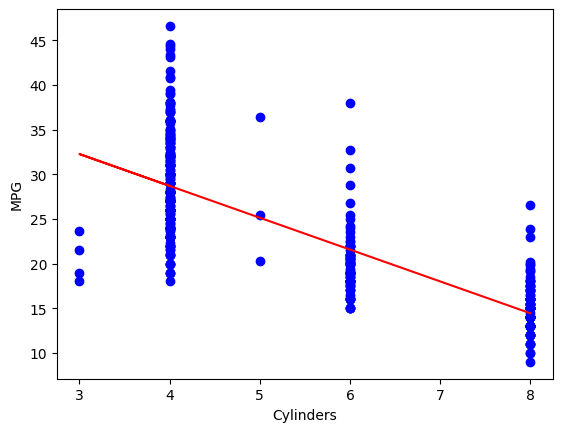

In [ ]:
plt.scatter(df.cylinders, df.mpg,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Cylinders")
plt.ylabel("MPG")

## Sources used for the creation of this notebook


*   [Explain your model predictions with LIME (Kaggle, prashant11)](https://www.kaggle.com/code/prashant111/explain-your-model-predictions-with-lime)
*   [Explainable AI with SHAP (Kaggle, narnaoot)](https://www.kaggle.com/code/narnaoot/explainable-ai-with-shap/notebook)
*   [Scikit-learn documentation](https://scikit-learn.org/stable/modules/)
*   [XGBoost for regression](https://machinelearningmastery.com/xgboost-for-regression/)
*   [Linear Regression in python: Predict the Bay areas home price](https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878)
*   [Linear regression implementing feature scaling (saturncloud)](https://saturncloud.io/blog/linear-regression-implementing-feature-scaling/#:~:text=The%20two%20most%20common%20methods,of%20your%20linear%20regression%20models.)
*   [Interpretable Machine Learning: A Guide for Making Black Box Models Explainable
(Christoph Molnar)](https://christophm.github.io/interpretable-ml-book/)
*   [What is Explainable AI (XAI)?](https://towardsdatascience.com/what-is-explainable-ai-xai-afc56938d513)
*   [Explaining xgb model with lime](https://www.kaggle.com/code/yohanb/explaining-xgb-model-with-lime)
*   Explainable AI for the end user, Marie Vandecavey








